In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# imports
import sys
sys.path.append("..")
#import os
#import shutil

from utils.model import Net_mask
import torch
#from torch.distributions.multivariate_normal import MultivariateNormal

import matplotlib.pyplot as plt

In [7]:
prior_weights = torch.load(f'../data/1.0e+05/rml_noise/0/noise_parameter.pt')[0]

In [8]:
model = Net_mask()
model.load_state_dict(torch.load('../saved_models/rml/short/e5/pos/0/model_weights.pth'))

<All keys matched successfully>

In [9]:
posterior_weights = torch.cat([param.view(-1) for param in model.parameters()])
prior_sorted, ind_priro = prior_weights.sort()
posterior_sorted, ind_posterior = posterior_weights.sort()
print(prior_sorted)
print(posterior_sorted)

tensor([-1.1782, -0.9896, -0.9801,  ...,  1.0584,  1.0599,  1.0608])
tensor([-1.1608, -1.0589, -1.0347,  ...,  1.2559,  1.2804,  1.3258],
       grad_fn=<SortBackward0>)


In [10]:
prior_numpy = prior_weights.detach().numpy()
posterior_numpy = posterior_weights.detach().numpy()
prior_sorted_numpy = prior_sorted.detach().numpy()
posterior_sorted_numpy = posterior_sorted.detach().numpy()

In [11]:
print(torch.mean(prior_weights))
print(torch.std(prior_weights))
print(torch.mean(posterior_weights))
print(torch.std(posterior_weights))

tensor(-0.0026)
tensor(0.2986)
tensor(0.0023, grad_fn=<MeanBackward0>)
tensor(0.1488, grad_fn=<StdBackward0>)


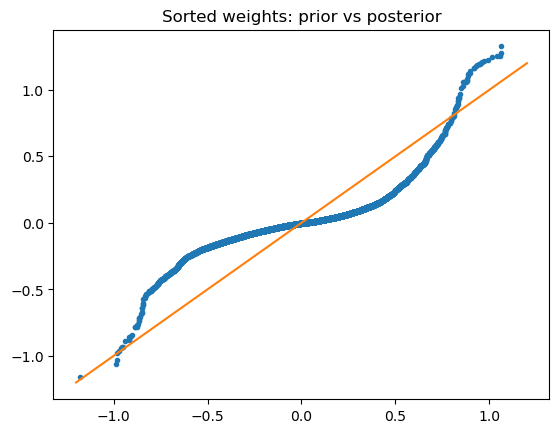

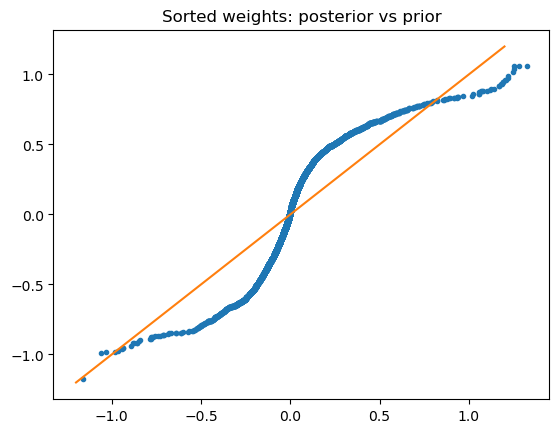

In [12]:
plt.figure()
plt.title('Sorted weights: prior vs posterior')
plt.plot(prior_sorted_numpy, posterior_sorted_numpy, '.')
plt.plot([-1.2, 1.2], [-1.2, 1.2])
plt.figure()
plt.title('Sorted weights: posterior vs prior')
plt.plot(posterior_sorted_numpy, prior_sorted_numpy, '.')
plt.plot([-1.2, 1.2], [-1.2, 1.2])

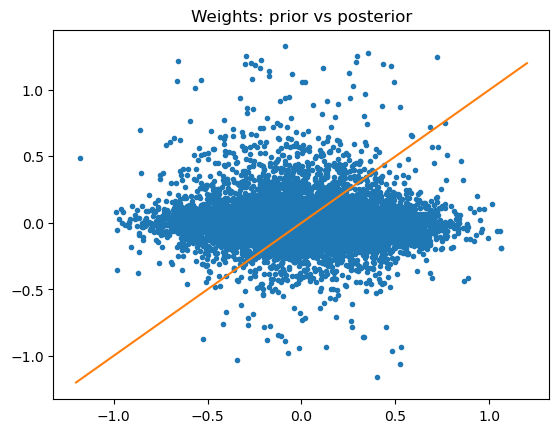

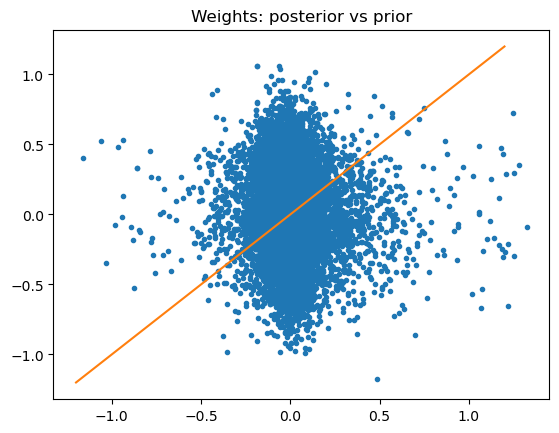

In [13]:
plt.figure()
plt.title('Weights: prior vs posterior')
plt.plot(prior_numpy, posterior_numpy, '.')
plt.plot([-1.2, 1.2], [-1.2, 1.2])
plt.figure()
plt.title('Weights: posterior vs prior')
plt.plot(posterior_numpy, prior_numpy, '.')
plt.plot([-1.2, 1.2], [-1.2, 1.2])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,   1.,   4.,   0.,
          3.,   2.,   1.,   3.,   2.,   2.,   1.,   1.,   2.,   6.,   2.,
          3.,   5.,   1.,   1.,   4., 

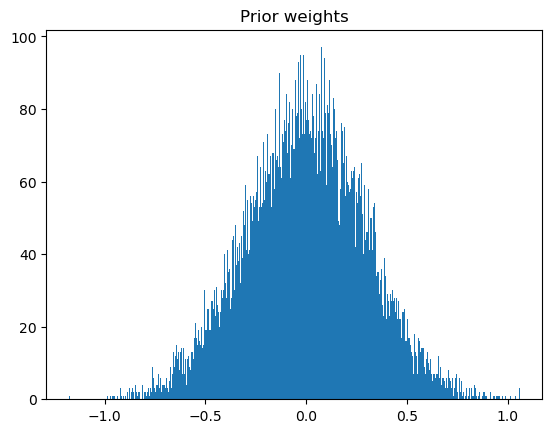

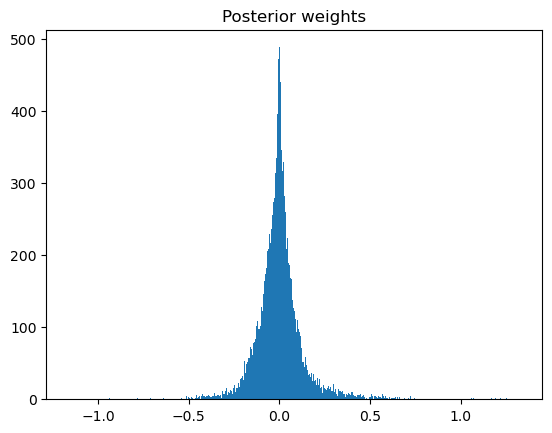

In [14]:
plt.figure()
plt.title('Prior weights')
plt.hist(prior_numpy, bins=500)
plt.figure()
plt.title('Posterior weights')
plt.hist(posterior_numpy, bins=500)